In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
train_data=pd.read_csv(r"D:\Data Analyst\Machine Learning\BlackFriday\Sales_BF\train\train.csv")
test_data=pd.read_csv(r"D:\Data Analyst\Machine Learning\BlackFriday\Sales_BF\test\test.csv")

In [3]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
train_data.shape

(550068, 12)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Null Value in Percentage

In [9]:
train_data.isnull().sum()/train_data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [10]:
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# EDA

C:\Users\rkrav\.conda\envs\analysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


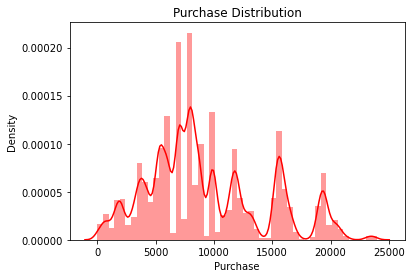

In [11]:
sns.distplot(train_data["Purchase"],color="r")
plt.title("Purchase Distribution")
plt.show()

C:\Users\rkrav\.conda\envs\analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


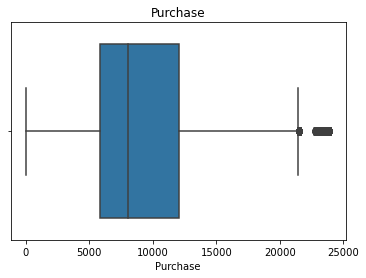

In [12]:
sns.boxplot(train_data["Purchase"])
plt.title("Purchase")
plt.show()

In [13]:
train_data["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

C:\Users\rkrav\.conda\envs\analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


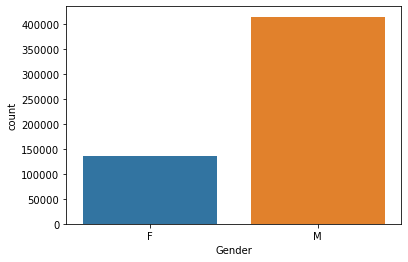

In [14]:
sns.countplot(train_data["Gender"])
plt.show()

In [15]:
train_data.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

C:\Users\rkrav\.conda\envs\analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


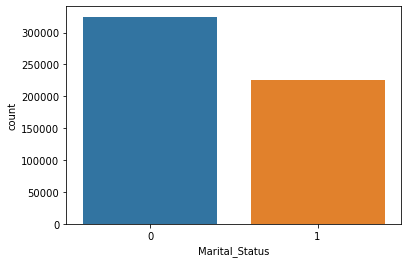

In [16]:
sns.countplot(train_data["Marital_Status"])
plt.show()

In [17]:
train_data['User_ID'].nunique()

5891

C:\Users\rkrav\.conda\envs\analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


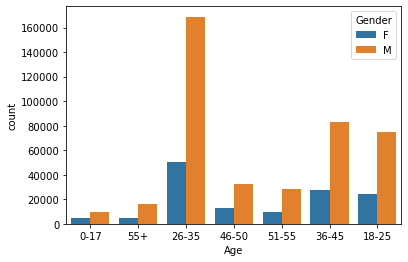

In [18]:
sns.countplot(train_data["Age"],hue=train_data["Gender"])
plt.show()

C:\Users\rkrav\.conda\envs\analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


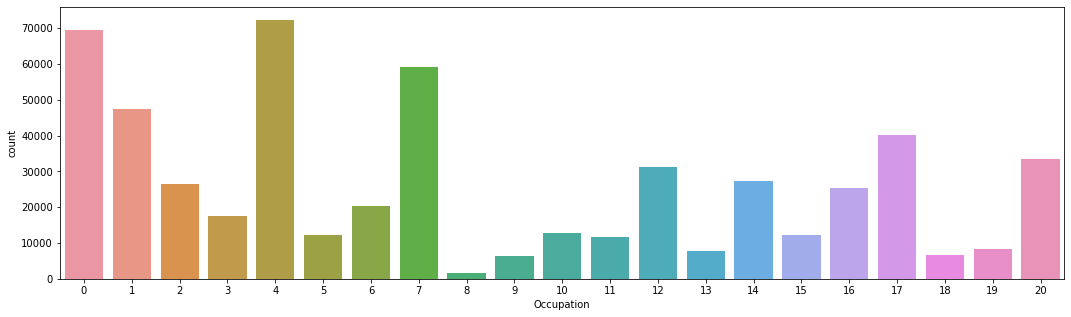

In [19]:
plt.figure(figsize=(18,5))
sns.countplot(train_data["Occupation"])
plt.show()

In [20]:
occup=pd.DataFrame(train_data.groupby("Occupation").mean()["Purchase"])
occup

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


C:\Users\rkrav\.conda\envs\analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


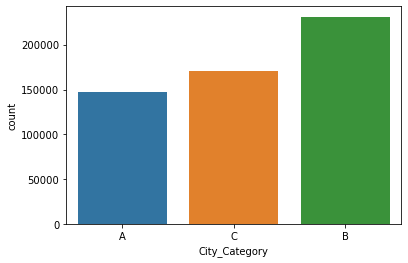

In [21]:
sns.countplot(train_data["City_Category"])
plt.show()

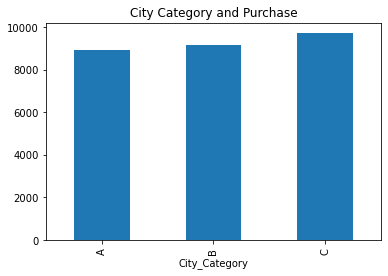

In [22]:
train_data.groupby("City_Category").mean()["Purchase"].plot(kind="bar")
plt.title("City Category and Purchase")
plt.show()


C:\Users\rkrav\.conda\envs\analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


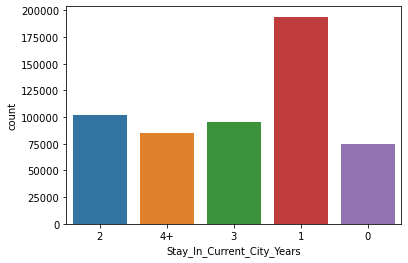

In [23]:
sns.countplot(train_data["Stay_In_Current_City_Years"])
plt.show()

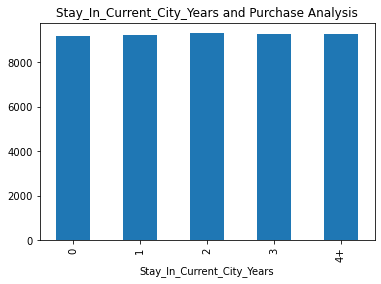

In [24]:
train_data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind="bar")
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

C:\Users\rkrav\.conda\envs\analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


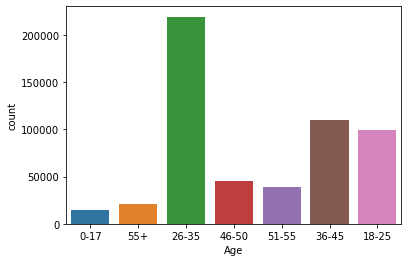

In [25]:
sns.countplot(train_data["Age"])
plt.show()

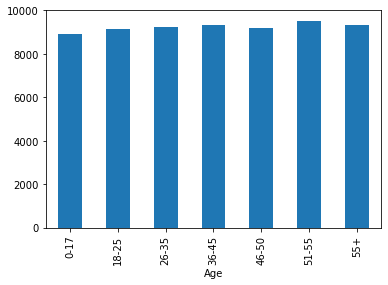

In [26]:
train_data.groupby("Age").mean()["Purchase"].plot(kind="bar")
plt.show()

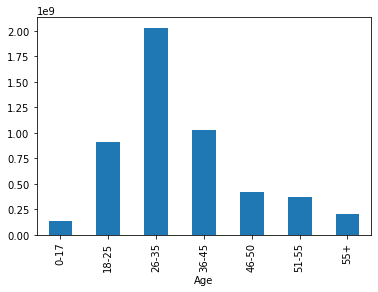

In [27]:
train_data.groupby("Age").sum()["Purchase"].plot(kind="bar")
plt.show()

C:\Users\rkrav\.conda\envs\analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


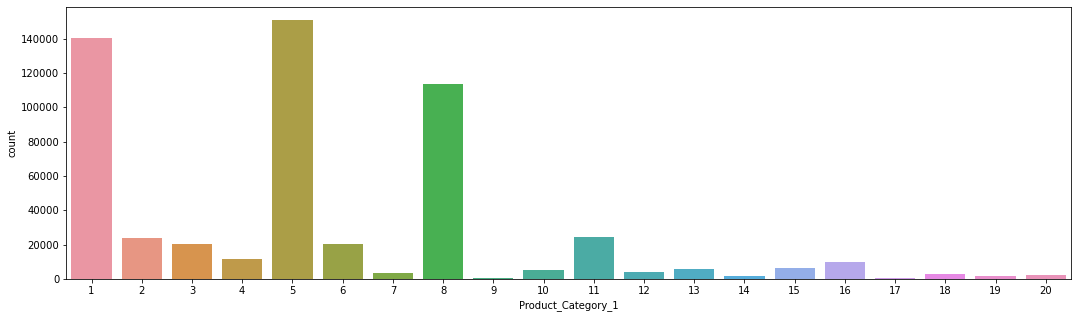

In [28]:
plt.figure(figsize=(18,5))
sns.countplot(train_data['Product_Category_1'])
plt.show()

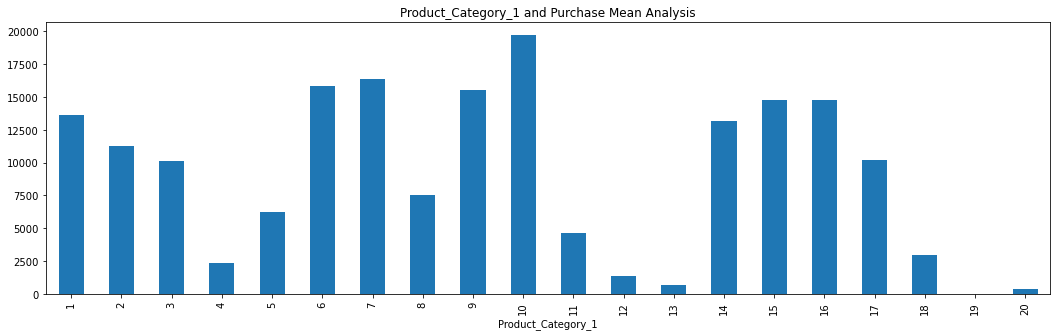

In [29]:
train_data.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

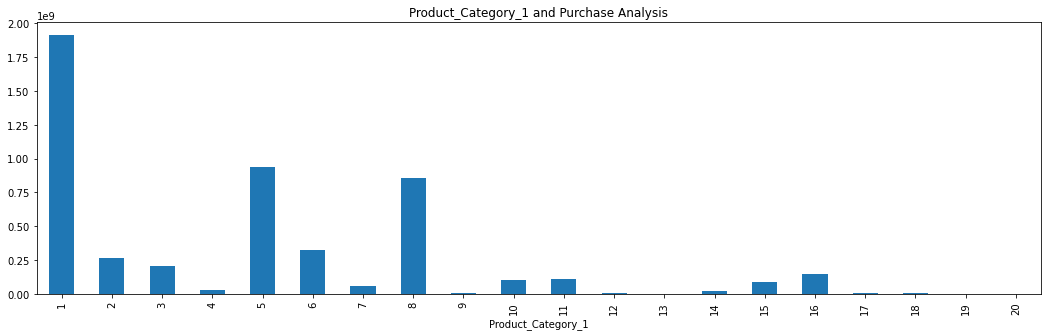

In [30]:
train_data.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

C:\Users\rkrav\.conda\envs\analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


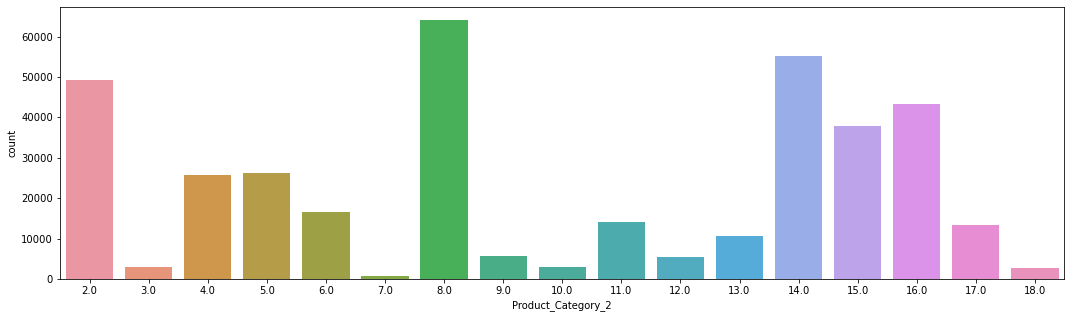

In [31]:
plt.figure(figsize=(18,5))
sns.countplot(train_data['Product_Category_2'])
plt.show()


C:\Users\rkrav\.conda\envs\analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


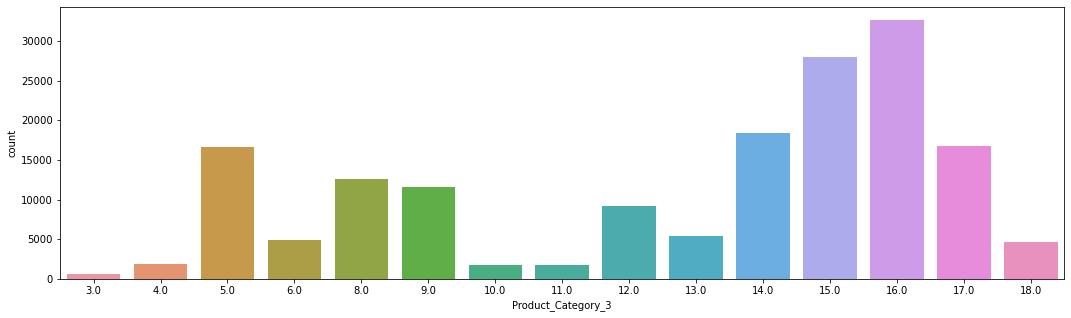

In [32]:
plt.figure(figsize=(18,5))
sns.countplot(train_data['Product_Category_3'])
plt.show()

In [33]:
train_data.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


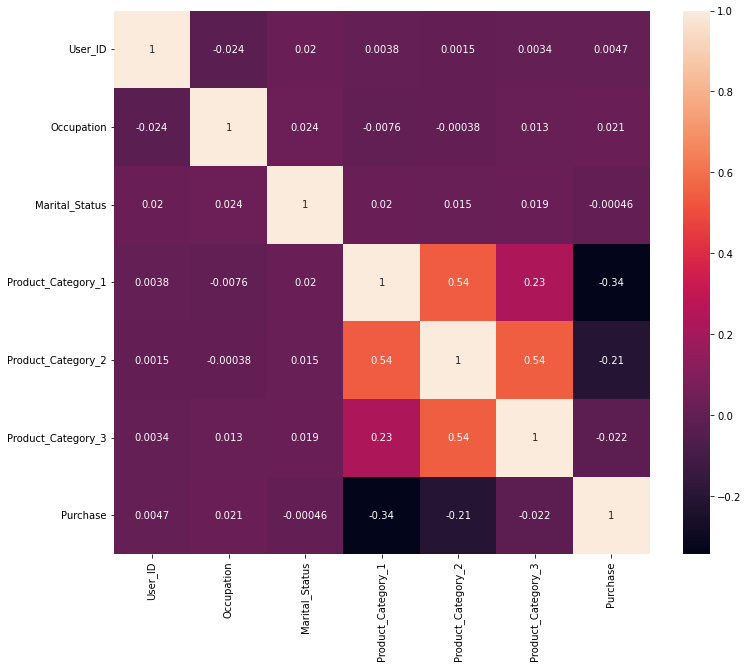

In [127]:
plt.figure(figsize=(12,10))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

In [35]:
train_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [36]:
df=train_data.copy()

In [37]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [38]:
df=pd.get_dummies(df,columns=["Stay_In_Current_City_Years"])

In [39]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,F,0-17,10,A,0,3,NaN,NaN,8370,0,0,1,0,0
1,1000001,P00248942,F,0-17,10,A,0,1,6.0,14.0,15200,0,0,1,0,0
2,1000001,P00087842,F,0-17,10,A,0,12,NaN,NaN,1422,0,0,1,0,0
3,1000001,P00085442,F,0-17,10,A,0,12,14.0,NaN,1057,0,0,1,0,0
4,1000002,P00285442,M,55+,16,C,0,8,NaN,NaN,7969,0,0,0,0,1


## Encoding the Categorical Variables

In [40]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()

In [41]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [42]:
df["Age"]=lr.fit_transform(df["Age"])

In [43]:
df["City_Category"]=lr.fit_transform(df["City_Category"])

In [44]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,0,10,0,0,3,NaN,NaN,8370,0,0,1,0,0
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,0,0,1,0,0
2,1000001,P00087842,0,0,10,0,0,12,NaN,NaN,1422,0,0,1,0,0
3,1000001,P00085442,0,0,10,0,0,12,14.0,NaN,1057,0,0,1,0,0
4,1000002,P00285442,1,6,16,2,0,8,NaN,NaN,7969,0,0,0,0,1


In [45]:
df=df.drop(["User_ID"],axis=1)
df=df.drop(["Product_ID"],axis=1)
df=df.drop(["Product_Category_3"],axis=1)

In [46]:
df.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,NaN,8370,0,0,1,0,0
1,0,0,10,0,0,1,6.0,15200,0,0,1,0,0
2,0,0,10,0,0,12,NaN,1422,0,0,1,0,0
3,0,0,10,0,0,12,14.0,1057,0,0,1,0,0
4,1,6,16,2,0,8,NaN,7969,0,0,0,0,1


In [47]:
df.isnull().sum()

Gender                                0
Age                                   0
Occupation                            0
City_Category                         0
Marital_Status                        0
Product_Category_1                    0
Product_Category_2               173638
Purchase                              0
Stay_In_Current_City_Years_0          0
Stay_In_Current_City_Years_1          0
Stay_In_Current_City_Years_2          0
Stay_In_Current_City_Years_3          0
Stay_In_Current_City_Years_4+         0
dtype: int64

In [48]:
df["Product_Category_2"]=df["Product_Category_2"].fillna(0).astype("int64")

In [49]:
df.isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Purchase                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   Gender                         550068 non-null  int32
 1   Age                            550068 non-null  int32
 2   Occupation                     550068 non-null  int64
 3   City_Category                  550068 non-null  int32
 4   Marital_Status                 550068 non-null  int64
 5   Product_Category_1             550068 non-null  int64
 6   Product_Category_2             550068 non-null  int64
 7   Purchase                       550068 non-null  int64
 8   Stay_In_Current_City_Years_0   550068 non-null  uint8
 9   Stay_In_Current_City_Years_1   550068 non-null  uint8
 10  Stay_In_Current_City_Years_2   550068 non-null  uint8
 11  Stay_In_Current_City_Years_3   550068 non-null  uint8
 12  Stay_In_Current_City_Years_4+  550068 non-null  uint8
dtyp

## Splitting Data into Independent and dependent variables

In [51]:
X=df.drop("Purchase",axis=1)

In [52]:
y=df["Purchase"]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

# Modeling

## Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
LR1=LinearRegression()

In [56]:
LR1.fit(X_train,y_train)

LinearRegression()

In [57]:
print("Train Score:",LR1.score(X_train,y_train))

Train Score: 0.12535292762371208


In [58]:
print("Test Score ", LR1.score(X_test, y_test))

Test Score  0.12477791173256758


In [59]:
y_pred_train=LR1.predict(X_train)
y_pred_train

array([ 9287.1328125, 10749.5625   , 11671.546875 , ...,  8413.71875  ,
        8761.953125 , 11228.75     ])

In [60]:
y_pred_test=LR1.predict(X_test)
y_pred_test

array([ 7470.046875 , 10240.203125 , 10346.4140625, ...,  9285.046875 ,
       11239.9921875, 11576.6328125])

In [61]:
print("Train MSE", np.mean((y_train-y_pred_train)**2))
print("Test MSE", np.mean((y_test-y_pred_test)**2))

Train MSE 22053211.422984395
Test MSE 22118112.92571389


In [62]:
print("Train MSE", np.sqrt(np.mean((y_train-y_pred_train)**2)))
print("Test MSE", np.sqrt(np.mean((y_test-y_pred_test)**2)))

Train MSE 4696.08469078065
Test MSE 4702.989785839843


In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [76]:
mean_absolute_error(y_test, y_pred_test)

3605.4350498383537

In [79]:
mean_squared_error(y_test, y_pred_test)

22118112.925747693

In [80]:
r2_score(y_test, y_pred_test)

0.12477791173256758

In [81]:
from math import sqrt

In [82]:
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred_test)))

RMSE of Linear Regression Model is  4702.989785843436


## DecisionTreeRegressor

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

dt_y_pred = regressor.predict(X_test)

print("Train accuracy:",regressor.score(X_train,y_train))

print("Test accuracy:",regressor.score(X_test,y_test))

Train accuracy: 0.7524667204076996
Test accuracy: 0.5999461437085372


In [69]:
regressor2= DecisionTreeRegressor(max_depth=8)

regressor2.fit(X_train, y_train)

dt_y_pred = regressor.predict(X_test)

print("Train accuracy:",regressor2.score(X_train,y_train))

print("Test accuracy:",regressor2.score(X_test,y_test))

Train accuracy: 0.6483504636572497
Test accuracy: 0.6463380002058238


In [83]:
regressor3 = DecisionTreeRegressor(max_depth= 30 ,criterion= 'mse' ,
                            min_samples_leaf= 50, 
                            min_samples_split=200)

regressor3.fit(X_train,y_train)
print("Train accuracy :" ,regressor3.score(X_train,y_train))
print("Test accuracy :" ,regressor3.score(X_test,y_test))

C:\Users\rkrav\.conda\envs\analysis\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


Train accuracy : 0.6642062984269378
Test accuracy : 0.6520589656744807


In [84]:
pred_train=regressor3.predict(X_train)  
pred_test=regressor3.predict(X_test)

In [86]:
print("Train Score ", regressor3.score(X_train, y_train)) 
print("Train Score ", regressor3.score(X_test, y_test))

Train Score  0.6642062984269378
Train Score  0.6520589656744807


In [87]:
print("Train MSE", np.mean((y_train-pred_train)**2))
print("Test MSE", np.mean((y_test-pred_test)**2))

Train MSE 8466648.696575973
Test MSE 8792967.170135751


In [88]:
print("Train RMSE", np.sqrt(np.mean((y_train-pred_train)**2)))
print("Test RMSE", np.sqrt(np.mean((y_test-pred_test)**2)))

Train RMSE 2909.7506244652604
Test RMSE 2965.293774676592


In [89]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [92]:
mean_absolute_error(y_test,pred_test)

2206.4826385580486

In [93]:
mean_squared_error(y_test, pred_test)

8792967.170135867

In [95]:
r2_score(y_test, pred_test)

0.6520589656744807

In [96]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test,pred_test)))

RMSE of Linear Regression Model is  2965.2937746766115


## Random Forest Regressor

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
RFregressor = RandomForestRegressor(random_state = 0)

RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [99]:
print("Train_accuracy",RFregressor.score(X_train,y_train))
print("Test_accuracy",RFregressor.score(X_test,y_test))

Train_accuracy 0.7468242307238574
Test_accuracy 0.6369587543660467


In [100]:
RFregressor2= RandomForestRegressor(max_depth= 30 ,criterion= 'mse' ,
                            min_samples_leaf= 50, 
                            min_samples_split=200)

RFregressor2.fit(X_train,y_train)
print("Train accuracy :" ,RFregressor2.score(X_train,y_train))
print("Test accuracy :" ,RFregressor2.score(X_test,y_test))

C:\Users\rkrav\.conda\envs\analysis\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Train accuracy : 0.66442973513931
Test accuracy : 0.6559576287633019


In [105]:
RFpred_train=RFregressor2.predict(X_train)  
RFpred_test=RFregressor2.predict(X_test)

In [106]:
print("Train MSE", np.mean((y_train-RFpred_train)**2))
print("Test MSE", np.mean((y_test-RFpred_test)**2))

Train MSE 8461014.999038683
Test MSE 8694442.382411994


In [107]:
print("Train RMSE", np.sqrt(np.mean((y_train-RFpred_train)**2)))
print("Test RMSE", np.sqrt(np.mean((y_test-RFpred_test)**2)))

Train RMSE 2908.782391145595
Test RMSE 2948.633985833439


In [104]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [108]:
mean_absolute_error(y_test,RFpred_test)

2205.577485162147

In [109]:
mean_squared_error(y_test, RFpred_test)

8694442.38241177

In [111]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, RFpred_test)))

RMSE of Linear Regression Model is  2948.6339858334013


## XGBoost Regressor

In [114]:
!pip install xgboost

In [115]:
from xgboost.sklearn import XGBRegressor

In [116]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=1.0, max_delta_step=0,
             max_depth=6, min_child_weight=40, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
print("Train_accuracy",xgb_reg.score(X_train,y_train))
print("Test_accuracy",xgb_reg.score(X_test,y_test))

Train_accuracy 0.677318871782489
Test_accuracy 0.6629248962347911


In [119]:
xgb_train_pred = xgb_reg.predict(X_train)
xgb_test_pred = xgb_reg.predict(X_test)

In [120]:
print("Train MSE", np.mean((y_train-xgb_train_pred)**2))
print("Test MSE", np.mean((y_test-xgb_test_pred)**2))

Train MSE 8136030.368750197
Test MSE 8518369.576683749


In [121]:
print("Train RMSE", np.sqrt(np.mean((y_train-xgb_train_pred)**2)))
print("Test RMSE", np.sqrt(np.mean((y_test-xgb_test_pred)**2)))

Train RMSE 2852.37276118501
Test RMSE 2918.6246035904906


In [122]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [123]:
mean_absolute_error(y_test, xgb_test_pred)

2178.454525536682

In [124]:
mean_squared_error(y_test, xgb_test_pred)

8518369.576681577

In [125]:
r2_score(y_test, xgb_test_pred)

0.6629248962347911

In [126]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgb_test_pred)))

RMSE of Linear Regression Model is  2918.6246035901186


### The ML algorithm that perform the best was XGBoost Regressor Model with RMSE = 2918